# Analiza obdelanih podatkov

In [1]:
import pandas as pd
nba = pd.read_csv('obdelani-podatki/vsi-nba-igralci.csv', index_col='ime')
pd.options.display.max_rows = 5
%matplotlib inline

## Prva naloga

Prvo vprašanje, ki sem si ga zastavil, je bilo: kateri od trenutno igralno aktivnih košarkarjev lige NBA, so najboljši glede na svojo karierno statistiko, po posameznem igralnem položaju?
Da bi na to odgovoril, moram v moji tabeli najprej definirati nov stolpec imenovan kariera, ki bo predstavljal nekakšno povprečje vseh kariernih statistih posameznega igralca, narejen pa bo na osnovi algoritma, ki sem si ga izmislil sam.

In [6]:
nba['kariera'] = (nba.tocke + (2 * nba.skoki) + (3 * nba.podaje)) / nba.minute

Sedaj si bom definiral pet novih tabel (katere bodo vsebovale le ime, igralni položaj in pa karierno statistiko posameznega igralca), eno za vsakega izmed petih igralnih položajev, kjer bo vsaka tabela predstavljala vrednost, po kateri bodo igralci razporejeni - to pa je seveda njihov igralni položaj.

In [7]:
nba_po_polozajih = nba[['polozaj', 'kariera']]
nba_pg = nba_po_polozajih[nba_po_polozajih.polozaj == 'Point guard']
nba_sg = nba_po_polozajih[nba_po_polozajih.polozaj == 'Shooting guard']
nba_sf = nba_po_polozajih[nba_po_polozajih.polozaj == 'Small forward']
nba_pf = nba_po_polozajih[nba_po_polozajih.polozaj == 'Power forward']
nba_c = nba_po_polozajih[nba_po_polozajih.polozaj == 'Center']

Prostane mi le še, da vsako izmed petih tabel uredim padajoče po karierni statistiki igralca in nato tabelo (ki bo prikazala le prvih pet igralcev) tudi prikažem.

In [8]:
nba_pg.sort_values('kariera', ascending=False).head(5)

,polozaj,kariera
ime,,
Russell Westbrook,Point guard,1.784884
Ben Simmons,Point guard,1.720238
Chris Paul,Point guard,1.610795
Luka Doncic,Point guard,1.543750
John Wall,Point guard,1.537604


In [9]:
nba_sg.sort_values('kariera', ascending=False).head(5)

,polozaj,kariera
ime,,
Rawle Alkins,Shooting guard,3.750000
Troy Caupain,Shooting guard,2.000000
P.J. Dozier,Shooting guard,1.409091
Dwyane Wade,Shooting guard,1.406433
Jordan Loyd,Shooting guard,1.333333


In [10]:
nba_sf.sort_values('kariera', ascending=False).head(5)

,polozaj,kariera
ime,,
LeBron James,Small forward,1.647668
James Harden,Small forward,1.547059
Kevin Durant,Small forward,1.443243
Carmelo Anthony,Small forward,1.284916
Paul George,Small forward,1.244048


In [11]:
nba_pf.sort_values('kariera', ascending=False).head(5)

,polozaj,kariera
ime,,
Blake Griffin,Power forward,1.515670
Kevin Love,Power forward,1.484472
Julius Randle,Power forward,1.448399
Giannis Antetokounmpo,Power forward,1.409786
Draymond Green,Power forward,1.340502


In [12]:
nba_c.sort_values('kariera', ascending=False).head(5)

,polozaj,kariera
ime,,
Joel Embiid,Center,1.821192
Nikola Jokic,Center,1.767025
DeMarcus Cousins,Center,1.643963
Boban Marjanovic,Center,1.612903
Karl-Anthony Towns,Center,1.526012


Rezultati so pokazali, da so najboljši NBA igralci po posameznem igralnem položaju, Russell Westbrook, Rawle Alkins, LeBron James, Blake Griffin in Joel Embiid. Ta statistika je zelo zanimiva, saj je med prikazanimi igralci veliko takih, ki na tekmah ne dobivajo veliko priložnost, bi pa jo očitno morali.

## Druga naloga

Drugo vprašanje, ki sem si ga zastavil, je bilo: kakšna je povezava med višino in težo nekega igralca ter njegovo karierno statistiko? Oziroma povedano drugače: kakšni sta idealni višina in teža, ki ju imajo najboljši NBA igralci (glede na karierno statistiko)? Da bi na to odgovoril, moram v mojo tabelo najprej dodati še dva stolpca, ki bosta prikazovala zaokrožene višine in teže posameznih igralcev (z_visina, z_teza), glede na katere bom na koncu prikazal dva grafa.

In [13]:
nba['z_visine'] = (10 * ((200 * nba.visina + 5) // 10)) / 200
nba['z_teze'] = (10 * ((2 * nba.teza + 5) // 10)) / 2

Sedaj bom definiral novo tabelo, ki bo prikazovala le ime, karierno statistiko ter zaokroženi višino in težo posameznega igralca. Nato bom iz te tabele ustvaril še dve novi, ki bosta prikazovali povprečno karierno statistiko igralcev, glede na določeno vrednost posamezne zaokrožene višine  oziroma teže - ti dve vrednosti bosta torej tisti, po katerih bom mojo tabelo uredil.

In [14]:
nov_nba = nba[['kariera', 'z_visine', 'z_teze']]
kariere_glede_na_visino = nov_nba.groupby('z_visine').mean()
kariere_glede_na_tezo = nov_nba.groupby('z_teze').mean()

Prostane mi le še, da oba rezultat tudi prikažem z grafom, nato pa iz njiju razberem podatke in naredim sklep.

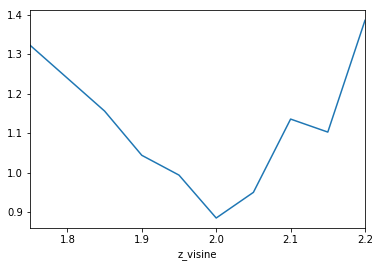

In [15]:
kariere_glede_na_visino['kariera'].plot()

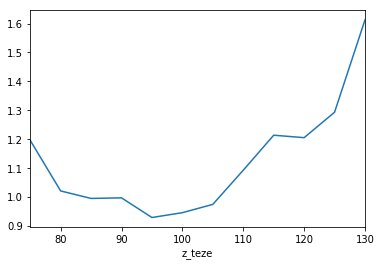

In [16]:
kariere_glede_na_tezo['kariera'].plot()

Rezultati so šokantni, saj so pokazali, da so (v nasprotju s splošnim prepričanjem) tisti NBA igralci, ki naj bi imeli idelani višino in težo (tj. 2.00 m in 100 kg), glede na karierno statistiko, v povprečju najslabši. Velika možnost je namreč, da če si igralec lige NBA in sta tvoji višina in teža preveliki (bolj) oziroma premajhni (manj), boš glede na svojo karierno statistiko zelo dober - in s tem eden od najboljših igralcev lige NBA.

## Tretja naloga

Tretje in zadnje vprašanje, ki sem si ga zastavil, pa je bilo: ali obstaja povezava med letnico rojstva nekega igralca in pa državo, iz katere ta isti igralec prihaja ali pa njegovim igralnim položajem? Oziroma povedano drugače: ali se iz države, iz katere nek igralec prihaja, da sklepati na njegovo letnico rojstva in obratno? In pa ali so obstajala različna obdobja, ko so se rojevali večinoma igralci s točno določenim igralnim položajem, ali ne? Da bi na to odgovoril, moram najprej mojo tabelo zožit na dve novi tabeli, ki bosta prikazovali le ime, letnico rojstva in pa državo oziroma igralni položaj posameznega igralca. Nato pa moram ti dve tabeli urediti in zaokrožit glede na vrednost, ki me zanima - to pa sta seveda država, iz katere posamezen igralec prihaja in pa njegov igralni položaj - dobil bom poprečne vrednosti letnic (zaokrožene na celo število, kar bom meddrugim pravtako storil) glede na moja državo oziroma vsak igralni položaj.

In [18]:
drzave_po_letih = nba[['drzava', 'leto']].groupby('drzava').mean()
drzave_po_letih['leto'] = (drzave_po_letih.leto // 1) + round(drzave_po_letih.leto % 1)
polozaj_po_letih = nba[['polozaj', 'leto']].groupby('polozaj').mean()
polozaj_po_letih['leto'] = (polozaj_po_letih.leto // 1) + round(polozaj_po_letih.leto % 1)

Preostane mi le še, da ti dve tabeli tudi prikažem in iz njiju razberem (oziroma izločim) podatke, ki me zanimajo.

In [19]:
drzave_po_letih

,leto
drzava,
Australia,1991.0
Austria,1995.0
...,...
United Kingdom,1991.0
United States,1992.0


In [20]:
polozaj_po_letih

,leto
polozaj,
Center,1992.0
Point guard,1992.0
Power forward,1992.0
Shooting guard,1992.0
Small forward,1992.0


Rezultati so pokazali, da je moja druga hipoteza bila napačna, saj očitno ni obstajalo obdobje, ko naj bi se rojevali večinoma igralci s točno določenim igralnim položajem. Drugače pa je bilo z mojo prvo hipotezo, ki pa je bila pravilna, saj se iz letnice rojstva nekega NBA igralca očitno da sklepati na državo, iz katere ta isti igralec prihaja in obratno. Če si vzamem en primer, me npr. zanima iz katere države prihaja povprečen NBA igralec, rojen leta 1998 in pa katerega leta je rojen povprečen NBA igralec, ki prihaja iz Slovenije.

In [21]:
drzave_po_letih[drzave_po_letih.leto == 1998.0]

,leto
drzava,
Bahamas,1998.0
Nigeria,1998.0


In [22]:
drzave_po_letih.loc["Slovenia"]

leto    1992.0
Name: Slovenia, dtype: float64

Ugotovil sem, da povprečen NBA igralec rojen leta 1998 prihaja ali iz Bahamov ali iz Nigerije. Povprečen NBA igralec, ki pa prihaja iz Slovenije, je rojen leta 1998.